In [1]:
#required installments

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import joblib


In [5]:
# Sample data
X = np.array([[1], [2], [3], [4], [5]])   # Number of pens
y = np.array([10, 20, 30, 40, 50])       # Price

In [6]:
df = pd.DataFrame({
    'Number_of_Pens': X.flatten(),
    'Price': y
})


In [7]:
# ---------------------------
# EDA
# ---------------------------

In [8]:
print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Number_of_Pens  5 non-null      int64
 1   Price           5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes
None


In [9]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       Number_of_Pens      Price
count        5.000000   5.000000
mean         3.000000  30.000000
std          1.581139  15.811388
min          1.000000  10.000000
25%          2.000000  20.000000
50%          3.000000  30.000000
75%          4.000000  40.000000
max          5.000000  50.000000


In [10]:
# ---------------------------
# Visualizations
# ---------------------------


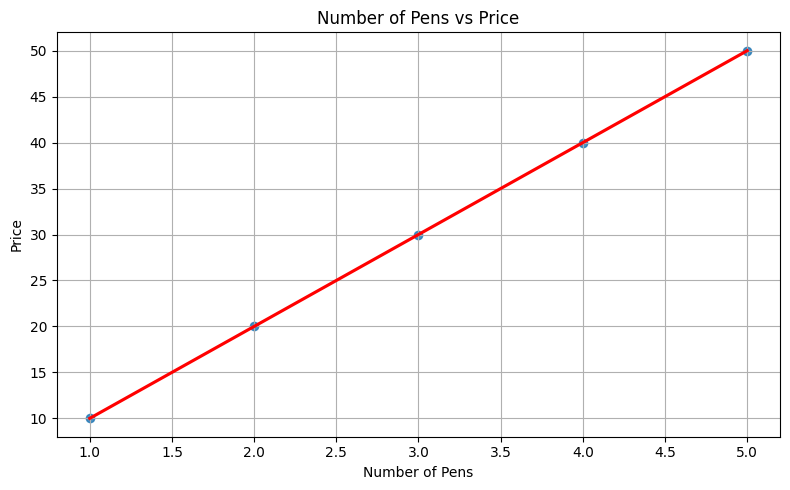

In [11]:
# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='Number_of_Pens', y='Price', data=df, ci=None, line_kws={"color": "red"})
plt.title("Number of Pens vs Price")
plt.xlabel("Number of Pens")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
#the above diagram as number of pen increases price increases hence the relation is linearregression relationship


In [13]:
# check the correlation using the heatmaps

/var/folders/7g/brqxpwgn0dj_26swf0cxlvfw0000gn/T/ipykernel_22505/1267673314.py:15: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/iralapraveen/.local/share/virtualenvs/pen-price-predictor-fqg1iaZR/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


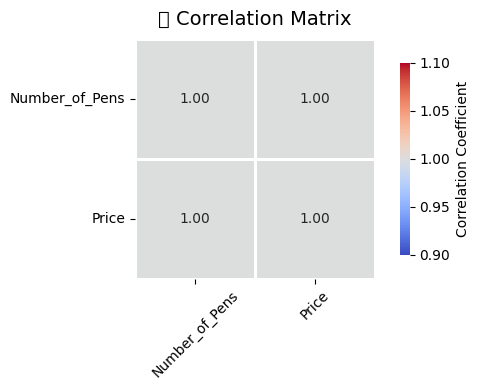

In [14]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)
plt.title("🔗 Correlation Matrix", fontsize=14, pad=10)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [15]:
# ---------------------------
# Train and Save the Model
# ---------------------------

In [16]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [17]:
# lets check the accuracy of the model

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predict using the model
y_pred = model.predict(X)

# Accuracy Metrics
print("\n📊 Model Evaluation:")
print(f"R² Score: {r2_score(y, y_pred):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y, y_pred):.2f}")



📊 Model Evaluation:
R² Score: 1.00
Mean Absolute Error: 0.00
Mean Squared Error: 0.00


In [31]:
#mean square lower is better
#(R² Score )model accounts for 100% of the variation in price based on the number of pens.
# MAE = 0(therefore the model predicts correcty there is no any difference between actual and preducted values


In [19]:
joblib.dump(model, 'pen_price_model.pkl')


['pen_price_model.pkl']